In [1]:
import models
import os
import pandas as pd
from models import get_raw_data, get_rpm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pasta ='database/dados_brutos/normal'

# pasta ='database/dados_brutos/horizontal-misalignment/0.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.0mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/2.0mm'

# pasta ='database/dados_brutos/imbalance/6g'
# pasta ='database/dados_brutos/imbalance/10g'
# pasta ='database/dados_brutos/imbalance/15g'
# pasta ='database/dados_brutos/imbalance/20g'
# pasta ='database/dados_brutos/imbalance/25g'
# pasta ='database/dados_brutos/imbalance/30g'
# pasta ='database/dados_brutos/imbalance/35g'

# pasta ='database/dados_brutos/overhang/ball_fault/0g'
pasta ='database/dados_brutos/overhang/ball_fault/6g'
# pasta ='database/dados_brutos/overhang/ball_fault/20g'
# pasta ='database/dados_brutos/overhang/ball_fault/35g'

# pasta ='database/dados_brutos/overhang/cage_fault/0g'
# pasta ='database/dados_brutos/overhang/cage_fault/6g'
# pasta ='database/dados_brutos/overhang/cage_fault/20g'
# pasta ='database/dados_brutos/overhang/cage_fault/35g'

# pasta ='database/dados_brutos/overhang/outer_race/0g'
# pasta ='database/dados_brutos/overhang/outer_race/6g'
# pasta ='database/dados_brutos/overhang/outer_race/20g'
# pasta ='database/dados_brutos/overhang/outer_race/35g'
 
# pasta ='database/dados_brutos/underhang/ball_fault/0g'
# pasta ='database/dados_brutos/underhang/ball_fault/6g'
# pasta ='database/dados_brutos/underhang/ball_fault/20g'
# pasta ='database/dados_brutos/underhang/ball_fault/35g'

# pasta ='database/dados_brutos/underhang/cage_fault/0g'
# pasta ='database/dados_brutos/underhang/cage_fault/6g'
# pasta ='database/dados_brutos/underhang/cage_fault/20g'
# pasta ='database/dados_brutos/underhang/cage_fault/35g'

# pasta ='database/dados_brutos/underhang/outer_race/0g'
# pasta ='database/dados_brutos/underhang/outer_race/6g'
# pasta ='database/dados_brutos/underhang/outer_race/20g'
# pasta ='database/dados_brutos/underhang/outer_race/35g'

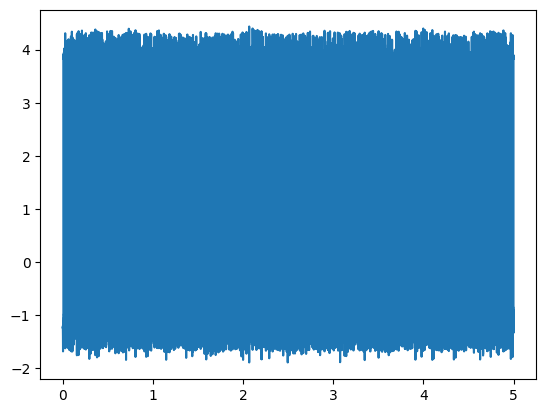

53.304904051172706


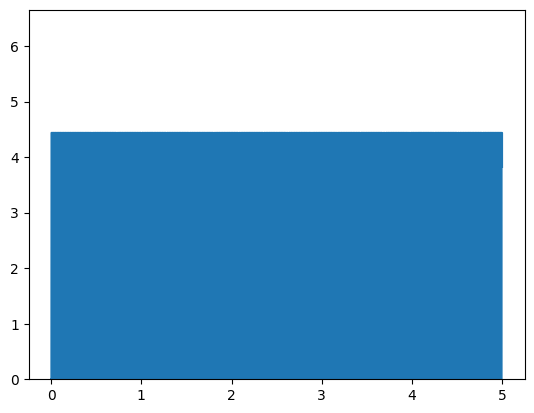

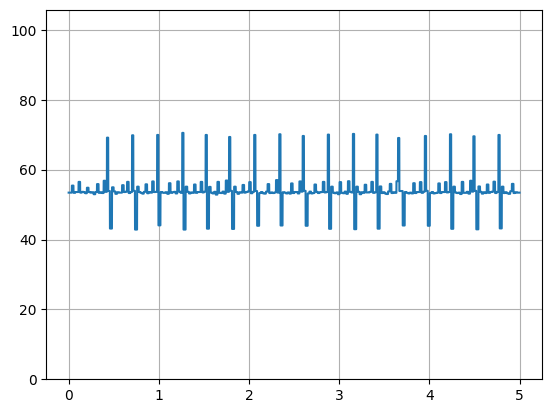

53.304904051172706


In [3]:
arquivos = os.listdir(pasta)
rpms = []
tamanho = 150000

sinal = get_raw_data.GetData(pasta,arquivos[-1],0)

sinal = sinal.Get()
# sinal = pd.json_normalize(sinal)


frequencia_aquisicao = models.freq_aquisicao
n_points = len(sinal)

t_total = n_points/frequencia_aquisicao

vetor_tempo = np.linspace(0,t_total,n_points)

plt.plot(vetor_tempo,sinal)
# plt.axis('off')
plt.show()

rpm = get_rpm.GetRPM(sinal)
rpm_ponto = rpm.get_rpm_ponto_a_ponto('hz')
rpm_medio = rpm.get_rpm_medio('hz')
print(rpm_medio)
rpm.plot_picos()
rpm.plot_rpm('hz')

print(rpm_medio)


12.459506603538502
13.646288209606983
15.073861923424783
15.518311607697084
16.512549537648614
18.011527377521613
18.82530120481928
19.54652071931196
21.114864864864863
21.939447125932425
22.76867030965392
24.131274131274125
24.987506246876563
25.79979360165118
26.709401709401703
27.654867256637168
28.58776443682104
29.29115407147042
30.48780487804878
31.387319522912744
32.981530343007925
33.28894806924101
34.86750348675036
35.76537911301859
36.5764447695684
37.85011355034066
38.88024883359253
39.68253968253969
40.518638573743914
41.28819157720892
42.337002540220155
43.337002540220155
44.337002540220155
45.12635379061373
46.04051565377533
47.04051565377533
48.355899419729205
49.355899419729205
50.355899419729205
51.355899419729205
52.355899419729205
53.355899419729205
54.355899419729205


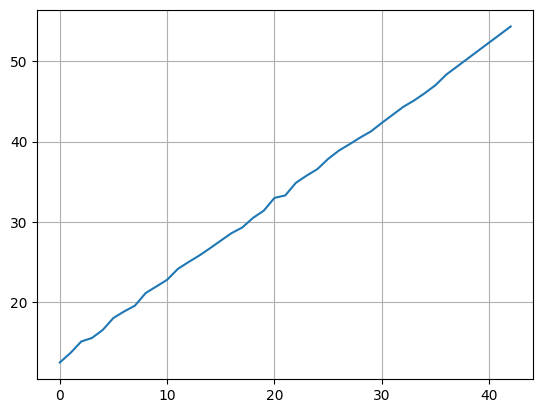

RPM minimo = 12.459506603538502
RPM máximo = 54.355899419729205


In [4]:
arquivos = os.listdir(pasta)

sinal_rpm = get_raw_data.GetData(pasta,arquivos[0],0)
sinal_rpm = sinal_rpm.Get()
rpm = get_rpm.GetRPM(sinal_rpm)
rpm_medio = rpm.get_rpm_medio('hz')

rpms = [rpm_medio]
frequencia_aquisicao = models.freq_aquisicao

for i in range(len(arquivos)):
    sinal_rpm = get_raw_data.GetData(pasta,arquivos[i],0)
    sinal_rpm = sinal_rpm.Get()
    # sinal_rpm = pd.json_normalize(sinal_rpm)


    n_points = len(sinal_rpm)

    t_total = n_points/frequencia_aquisicao

    vetor_tempo = np.linspace(0,t_total,n_points)

    rpm = get_rpm.GetRPM(sinal_rpm)
    rpm_medio = rpm.get_rpm_medio('hz')
    

    if np.abs(rpm_medio) > np.abs(rpms[-1])+3:
        rpm_medio = rpms[-1]+1

    rpms.append(rpm_medio)

    print(rpm_medio)

rpms.pop(0)

plt.plot(range(len(rpms)),rpms)
plt.grid(True)
plt.show()

print(f'RPM minimo = {np.min(rpms)}')
print(f'RPM máximo = {np.max(rpms)}')


In [5]:
import models
from models import get_raw_data, extrair_indicadores,listar_rpms
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

rpms = listar_rpms.ListaRPM(pasta).Get()
print(rpms)

[12.459506603538502, 13.646288209606983, 15.073861923424783, 15.518311607697084, 16.512549537648614, 18.011527377521613, 18.82530120481928, 19.54652071931196, 21.114864864864863, 21.939447125932425, 22.76867030965392, 24.131274131274125, 24.987506246876563, 25.79979360165118, 26.709401709401703, 27.654867256637168, 28.58776443682104, 29.29115407147042, 30.48780487804878, 31.387319522912744, 32.981530343007925, 33.28894806924101, 34.86750348675036, 35.76537911301859, 36.5764447695684, 37.85011355034066, 38.88024883359253, 39.68253968253969, 40.518638573743914, 41.28819157720892, 42.337002540220155, 43.337002540220155, 44.337002540220155, 45.12635379061373, 46.04051565377533, 47.04051565377533, 48.355899419729205, 49.355899419729205, 50.355899419729205, 51.355899419729205, 52.355899419729205, 53.355899419729205, 54.355899419729205]
